In [57]:
import pandas as pd
import tensorflow as tf
import seaborn as sb
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression as lr
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer

In [3]:
df = pd.read_csv('data/wine_review/winemag-data_first150k.csv')
df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


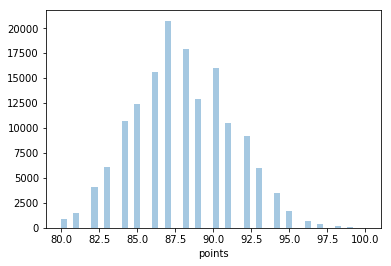

In [8]:
sb.distplot(df['points'], kde=False)

In [18]:
df['rating'] = df['points'].apply(lambda x: 0 if x<87.5 else 1)
df_new = df[['description', 'rating']]

In [21]:
df_new[df_new.rating==0].sample(5)

,description,rating
39978,"Distinctly grassy, vegetal aromas add savorine...",0
28899,"Rich in apricot, orange and tropical fruits, w...",0
128877,"This is soft in tannins, crisp in acids, and t...",0
20441,"A blend of Douro grapes, this wine is earthy a...",0
38023,"Fresh and floral on the nose and palate, this ...",0


In [22]:
df_new[df_new.rating==1].sample(5)

,description,rating
75543,"This Merlot-dominated, five-grape Bordeaux-sty...",1
24511,"Along with all the ripe fruit in the wine, the...",1
85338,This shows the power and purity of the winery'...,1
148939,Layers of dried fruits and prunes give a fruit...,1
10031,From a parcel that is outside the Premier Cru ...,1


In [30]:
count_vect = CountVectorizer()
description_list = df_new['description'].tolist()
x_train_counts = count_vect.fit_transform(description_list)

In [42]:
print(len(count_vect.get_feature_names()))
x_train_counts, df_new.shape

30748


(<150930x30748 sparse matrix of type '<type 'numpy.int64'>'
 	with 5162508 stored elements in Compressed Sparse Row format>, (150930, 2))

In [43]:
tfidf_transformer = TfidfTransformer()
x_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)

In [44]:
x_train_tfidf

<150930x30748 sparse matrix of type '<type 'numpy.float64'>'
	with 5162508 stored elements in Compressed Sparse Row format>

In [48]:
train_x, test_x, train_y, test_y = train_test_split(x_train_tfidf, df['rating'].tolist(), test_size=0.3)

In [53]:
train_x.shape, test_x.shape, len(train_y), len(test_y)

((105651, 30748), (45279, 30748), 105651, 45279)

In [55]:
clf = MultinomialNB().fit(train_x, train_y)
y_score = clf.predict(test_x)

n_right = 0
for i in range(len(y_score)):
    if y_score[i] == test_y[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))

Accuracy: 81.70%


In [ ]:
clf = SVC(kernel='linear').fit(train_x, train_y)
y_score = clf.predict(test_x)

n_right = 0
for i in range(len(y_score)):
    if y_score[i] == test_y[i]:
        n_right += 1

print("Accuracy: %.2f%%" % ((n_right/float(len(test_y)) * 100)))